In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
import numpy as np
#from sklearn.metrics.classification import accuracy_score

%matplotlib inline

In [2]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
train_set_x_orig.shape

(209, 64, 64, 3)

In [4]:
train_set_y

array([[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [6]:
train_set_x =train_set_x_orig / 255.
test_set_x = test_set_x_orig / 255.

In [8]:
train_set_x

array([[[[0.06666667, 0.12156863, 0.21960784],
         [0.08627451, 0.12941176, 0.23137255],
         [0.09803922, 0.1372549 , 0.24313725],
         ...,
         [0.00392157, 0.10980392, 0.22352941],
         [0.00392157, 0.10196078, 0.21960784],
         [0.00392157, 0.08627451, 0.2       ]],

        [[0.09803922, 0.14117647, 0.24313725],
         [0.10980392, 0.14901961, 0.25098039],
         [0.11764706, 0.15686275, 0.2627451 ],
         ...,
         [0.00392157, 0.10588235, 0.21960784],
         [0.00392157, 0.09803922, 0.21568627],
         [0.00784314, 0.08235294, 0.2       ]],

        [[0.1254902 , 0.15686275, 0.2627451 ],
         [0.13333333, 0.16470588, 0.27058824],
         [0.1372549 , 0.16470588, 0.2745098 ],
         ...,
         [0.00392157, 0.09803922, 0.21568627],
         [0.        , 0.09411765, 0.21176471],
         [0.00392157, 0.08235294, 0.2       ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

y = [1], it's a 'cat' picture.


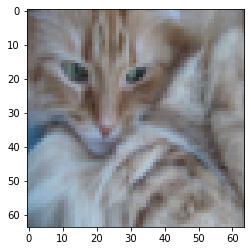

In [7]:
# Example of a picture
index = 2
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [9]:
m_train = train_set_x.shape[0]
m_test = test_set_x.shape[0]
num_px = train_set_x.shape[1]

# Print data shape
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(train_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (209, 64, 64, 3)
test_set_y shape: (1, 50)


In [10]:
# Reshape the training and test examples

train_set_x_flatten = train_set_x.reshape(train_set_x.shape[0], -1).T    
test_set_x_flatten = test_set_x.reshape(test_set_x.shape[0], -1).T  
# Check that the first 10 pixels of the second image are in the correct place
#assert np.alltrue(train_set_x_flatten[0:10, 1] == [196, 192, 190, 193, 186, 182, 188, 179, 174, 213]), "Wrong solution. Use (X.shape[0], -1).T."
#assert np.alltrue(test_set_x_flatten[0:10, 1] == [115, 110, 111, 137, 129, 129, 155, 146, 145, 159]), "Wrong solution. Use (X.shape[0], -1).T."

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


In [11]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [12]:
def initialize_with_zeros(dim):
    n=np.zeros((dim,1))
    hidden_weights=[n,n,n,n,n]
    hidden_bias = [0,0,0,0,0]
    output_weights = np.array([[0],[0],[0],[0],[0]])
    output_bias = np.array([[0]])
    return  hidden_weights, hidden_bias, output_weights,output_bias
a=[]
for i in range(12288):
    a=a+[0]
hidden_weights= np.array([a,a,a,a,a])
print(hidden_weights)
hidden_bias = [0,0,0,0,0]
output_weights = np.array([[0],[0],[0],[0],[0]])
output_bias =  np.array([[0]])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [13]:
np.zeros((12288))

array([0., 0., 0., ..., 0., 0., 0.])

In [14]:
n=1000
learning_rate= 0.1
m=209
y_predict=[]
print(train_set_y[0][2])
for i in range(n):
    for s in range(0,208):
        #Forward Pass
        m=np.array([[row[s] for row in train_set_x_flatten]])
        #print(np.array(m))

        hidden_layer_sum = np.dot(m,hidden_weights.T) + hidden_bias

        hidden_layer_out = sigmoid(hidden_layer_sum)

        output_layer_sum = np.dot(hidden_layer_out,output_weights) + output_bias

        predicted_y = sigmoid(output_layer_sum)
        if(i%100==0):
            print(predicted_y[0][0]," y reel est :",train_set_y[0][s])
        if (i==999):
            y_predict=ypredict+predicted_y
        #hidden layer

        dloss_dw_h= m.T.dot((predicted_y-train_set_y[0][s])* sigmoid_derivative(predicted_y).dot(output_weights.T)*sigmoid_derivative(hidden_layer_out))

        dloss_dbias_h=(predicted_y-train_set_y[0][s])* sigmoid_derivative(predicted_y).dot(output_weights.T)*sigmoid_derivative(hidden_layer_out)

        #output layer

        dloss_dw_out=hidden_layer_out.T.dot((predicted_y-train_set_y[0][s])*sigmoid_derivative(predicted_y))

        dloss_dbias_out=(predicted_y-train_set_y[0][s])*sigmoid_derivative(predicted_y)
        #update

        hidden_weights=hidden_weights-(dloss_dw_h*learning_rate).T

        hidden_bias-=dloss_dbias_h*learning_rate

        hidden_bias=np.sum(hidden_bias,axis=0,keepdims=True)

        output_weights=output_weights-(dloss_dw_out*learning_rate).T

        output_bias=output_bias-np.sum(dloss_dbias_out,axis=0,keepdims=True)*learning_rate
        
    #print("------------------")
            


1
0.5  y reel est : 0
0.4933909055494883  y reel est : 0
0.48604819556734336  y reel est : 1
0.49429764938533716  y reel est : 0
0.4880842902095135  y reel est : 0
0.48142949868394536  y reel est : 0
0.4737482091981584  y reel est : 0
0.4644209862960281  y reel est : 1
0.4765584946659675  y reel est : 0
0.46692028706182676  y reel est : 0
0.4510543314340762  y reel est : 0
0.4366011097764632  y reel est : 1
0.46025448940532615  y reel est : 0
0.4429919434969513  y reel est : 1
0.46936232796770455  y reel est : 1
0.48160490083805896  y reel est : 0
0.46794473002734244  y reel est : 0
0.45242580533600457  y reel est : 0
0.43964948496593975  y reel est : 0
0.4336009844715351  y reel est : 1
0.4420609885288499  y reel est : 0
0.43140719635376534  y reel est : 0
0.4090017954628723  y reel est : 0
0.3946914976883983  y reel est : 0
0.3811689736179205  y reel est : 1
0.4145969411925883  y reel est : 1
0.42181284599263474  y reel est : 0
0.4075380714276672  y reel est : 1
0.43517708781818326  

C:\Users\triangle info\AppData\Local\Temp\ipykernel_19872\178504725.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


0.9219609120307529  y reel est : 0
0.0052091630384076505  y reel est : 0
0.9323887102550275  y reel est : 1
0.005212215592590998  y reel est : 0
0.005208163349374913  y reel est : 0
0.005204117386824546  y reel est : 0
0.005200077690373136  y reel est : 0
0.9324422526650354  y reel est : 1
0.0052031262203979765  y reel est : 0
0.005199088058258303  y reel est : 0
0.00519505686264094  y reel est : 0
0.9325039110473001  y reel est : 1
0.00519904529258395  y reel est : 0
0.932581782253514  y reel est : 1
0.9326676308223523  y reel est : 1
0.005208196698547855  y reel est : 0
0.005204150684348282  y reel est : 0
0.005200110936328071  y reel est : 0
0.010542489921458021  y reel est : 0
0.9327122406793529  y reel est : 1
0.0051955674942575775  y reel est : 0
0.0051915410233886695  y reel est : 0
0.9327814846152189  y reel est : 0
0.005090885473443369  y reel est : 0
0.9315785227212916  y reel est : 1
0.931666888103578  y reel est : 1
0.005101070463596  y reel est : 0
0.9317469209073139  y re

NameError: name 'ypredict' is not defined

In [15]:
y_predict=list([])
for s in range(0,50):
        #Forward Pass
        m=np.array([[row[s] for row in test_set_x_flatten]])
        #print(np.array(m))

        hidden_layer_sum = np.dot(m,hidden_weights.T) + hidden_bias

        hidden_layer_out = sigmoid(hidden_layer_sum)

        output_layer_sum = np.dot(hidden_layer_out,output_weights) + output_bias

        predicted_y = sigmoid(output_layer_sum)
        
        print(predicted_y[0][0]," y reel est :",test_set_y[0][s])
       
        y_predict.append(predicted_y [0][0]) 
print(y_predict)



0.990065138106109  y reel est : 1
0.990065138106109  y reel est : 1
0.990065138106109  y reel est : 1
0.990065138106109  y reel est : 1
0.990065138106109  y reel est : 1
0.990065138106109  y reel est : 0
0.0002736496044281075  y reel est : 1
0.990065138106109  y reel est : 1
0.990065138106109  y reel est : 1
0.990065138106109  y reel est : 1
0.989279212812912  y reel est : 1
0.9900651380802022  y reel est : 1
0.990065138106109  y reel est : 1
0.990065138106109  y reel est : 0
0.0002736496044281075  y reel est : 0
0.990065138106109  y reel est : 1
0.0002736496044281075  y reel est : 0
0.990065138106109  y reel est : 1
0.9900651380238591  y reel est : 1
0.0002736496044281075  y reel est : 1
0.990065138106109  y reel est : 1
0.0002736496044281075  y reel est : 0
0.0002736496044281075  y reel est : 0
0.990065138106109  y reel est : 1
0.990065138106109  y reel est : 1
0.990065138106109  y reel est : 1
0.990065138106109  y reel est : 1
0.0002736496044281075  y reel est : 0


C:\Users\triangle info\AppData\Local\Temp\ipykernel_19872\178504725.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


0.0002736496044281075  y reel est : 1
0.990065138106109  y reel est : 0
0.0002736496044281075  y reel est : 1
0.990065138106109  y reel est : 1
0.990065138106109  y reel est : 1
0.0002736496044281075  y reel est : 1
0.990065138106109  y reel est : 0
0.0002736496044281075  y reel est : 0
0.0002736496044281075  y reel est : 0
0.990065138106109  y reel est : 1
0.0002736496044281075  y reel est : 0
0.0002736496044281075  y reel est : 0
0.990065138106109  y reel est : 1
0.990065138106109  y reel est : 1
0.990065138106109  y reel est : 1
0.0002736496044281075  y reel est : 0
0.990065138106109  y reel est : 0
0.990065138106109  y reel est : 0
0.990065138106109  y reel est : 1
0.990065138106109  y reel est : 1
0.990065138106109  y reel est : 1
0.990065138106109  y reel est : 0
[0.990065138106109, 0.990065138106109, 0.990065138106109, 0.990065138106109, 0.990065138106109, 0.990065138106109, 0.0002736496044281075, 0.990065138106109, 0.990065138106109, 0.990065138106109, 0.989279212812912, 0.9900

In [16]:
for i in range(0,50):
    if(y_predict[i]>0.5):
        y_predict[i]=1
    else:
        y_predict[i]=0


In [17]:
y_predict

[1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1]

In [18]:
print(y_predict)
y_predict=np.array([y_predict]) 
print(len(y_predict[0]))
print(len(test_set_y[0]))

[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
50
50


In [19]:
 print("test accuracy: {} %".format(100 - np.mean(np.abs(test_set_y - y_predict)) * 100))

test accuracy: 76.0 %
